# 4.9 Intro to Data Visualization with Python - Part 2

## This script contains the following points:

### Step 1 -  Import data and libraries
### Step 3 - Create an hourly orders histogram
### Step 4 - Create a loyalty flag bar chart
### Step 5 - Create an hourly expenditure line chart
### Step 6 - Create a customer demographics line chart
### Step 7 - Create a spending by age scatterplot
### Step 8 - Export visualizations

## 1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign project folder path to a variable

path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 4\07-2023 Instacart Basket Analysis'

In [3]:
# Import data

ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check output

ords_prods_custs_merge.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
# Check shape

ords_prods_custs_merge.shape

(32404859, 33)

In [6]:
# Drop "_merge" column

ords_prods_custs_merge.drop(columns = ['_merge'])

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,4.7,Low-range product,Regularly busy,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer
32404855,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,4.0,Low-range product,Regularly busy,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer
32404856,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,4.7,Low-range product,Regularly busy,Average orders,4,New customer,3.886667,Low spender,12.0,Regular customer
32404857,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,...,1.8,Low-range product,Regularly busy,Most orders,4,New customer,3.886667,Low spender,12.0,Regular customer


## Step 3 - Create an hourly orders histogram

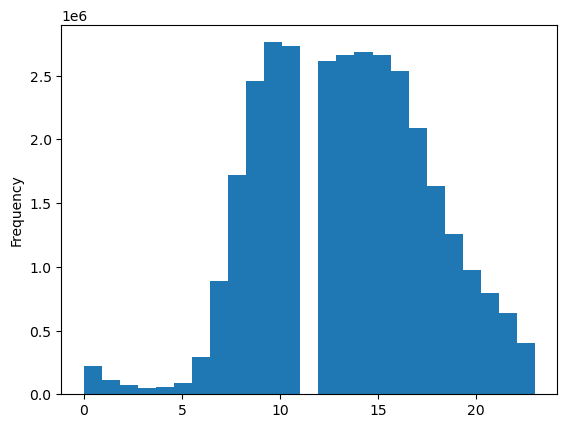

In [27]:
#Create a histogram of the “order_hour_of_day” column

hist = ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 25)

The histogram shows that orders start to ramp up at about 7a.  Most orders are placed between 9a - 4p, which is during normal working hours, and then starts to trail off during the evening hours and into late night.  There is a period where there seems to be very little or no orders placed around lunch time.  Would need to find out if people are legitimately not ordering or if the app/ordering portal is down during this time or something that needs to be looked into.

## Step 4 - Create a loyalty flag bar chart

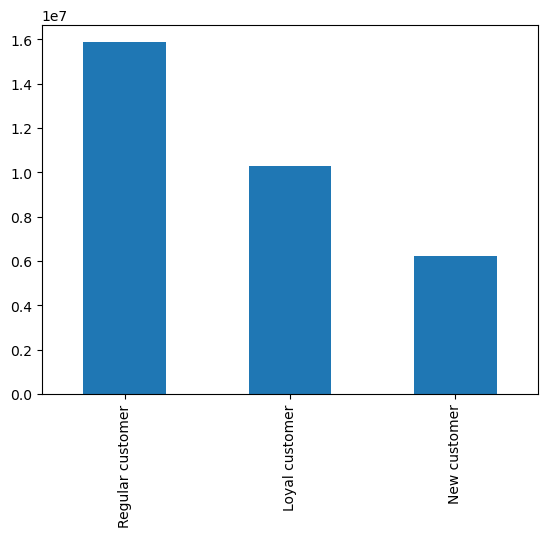

In [28]:
# Create a bar chart from the "loyalty_flag" column

bar = ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar()

## Step 5 - Create an hourly expenditure line chart

In [9]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(ords_prods_custs_merge)) <= 0.7

In [10]:
# Store 70% of the sample in the dataframe big

big = ords_prods_custs_merge[dev]

In [11]:
# Store 30% of the sample in the dataframe small

small = ords_prods_custs_merge[~dev]

In [12]:
# Add both samples together to check results

len(ords_prods_custs_merge)

32404859

In [13]:
len(big) + len(small)

32404859

Confirmed:  Number of rows in both samples added together is the same number of rows as the original dataframe.

In [14]:
# Reduce samples to only "prices" and "order_hour_of_day" columns from the "small" subset

df_2 = small[['order_hour_of_day', 'prices']]

In [15]:
# Check output

df_2.head()

,order_hour_of_day,prices
2,15,9.0
3,9,12.6
4,11,12.6
7,15,12.6
11,17,4.3


In [16]:
# Check shape

df_2.shape

(9717832, 2)

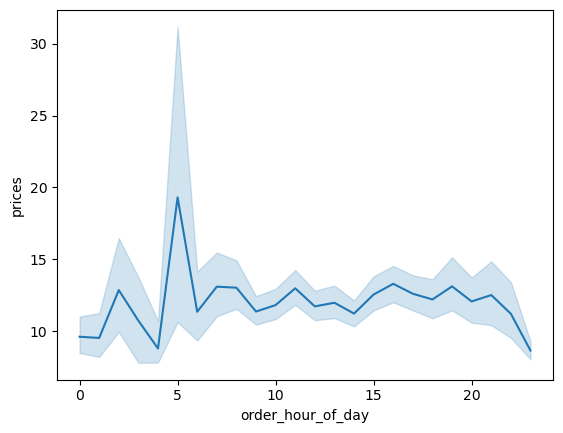

In [17]:
# Create a line chart

line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

The peaks between hours 1 - 5 show that most money is spent during early sleepless hours of the morning!  Spending during the normal waking hours 6 - 20 are comparable and taper off when most people are going to bed.

## Step 6 - Create a customer demographics line chart

In [18]:
# Reduce samples to only "age" and "number_of_dependents" columns from the "small" subset

df_3 = small[['age', 'number_of_dependents']]

In [19]:
# Check output

df_3.head()

,age,number_of_dependents
2,48,3
3,48,3
4,48,3
7,48,3
11,48,3


In [20]:
# Check shape

df_3.shape

(9717832, 2)

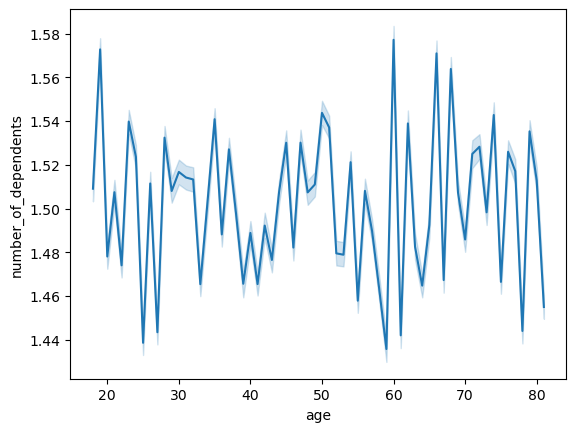

In [29]:
# Create a line chart

line_2 = sns.lineplot(data = df_3, x = 'age', y = 'number_of_dependents')

The line chart shows that there is no notable relationship between age and number of dependents in this Instacart data frame.

## Step 7 - Create a spending by age scatterplot

In [22]:
# Reduce samples to only "age" and "income" columns from the "small" subset

df_4 = small[['age', 'income']]

In [23]:
# Check output

df_4.head()

,age,income
2,48,165665
3,48,165665
4,48,165665
7,48,165665
11,48,165665


In [24]:
# Check shape

df_4.shape

(9717832, 2)

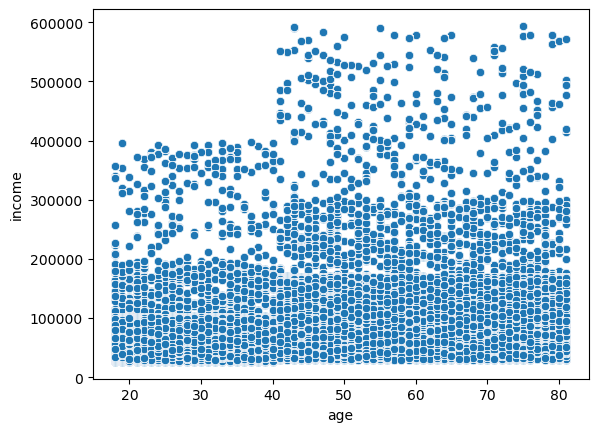

In [34]:
# Create a scatterplot of the "age" and "income" columns

scatt = sns.scatterplot(x = 'age', y = 'income', data = df_4)

The scatterplot shows a notable increase in spending power after age 40.

## Step 8 - Export visualizations

In [30]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day'))

In [31]:
# Export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag'))

In [32]:
# Export line charts

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hour_of_day'))

In [33]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_number_of_dependents'))

In [35]:
# Export scatterplot

scatt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatt_age_income'))